<a href="https://colab.research.google.com/github/sqiprasanna/climate_change_tweets_sentiment_analysis/blob/main/code/SVG_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:

import pandas as pd
import matplotlib.pyplot as plt 
from wordcloud import STOPWORDS 
# !pip install xlrd==1.2.0
import cufflinks as cf
import regex as re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

# !pip install xlrd==1.2.0
# TF IDF
from sklearn.model_selection import cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split,cross_validate
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix


Y      2554
N      1053
Yes     557
No       61
Name: existence, dtype: int64
(4134, 4)
Yes    3029
No     1105
Name: existence, dtype: int64
(4134, 4)
0       Global warming report urges governments to act...
1       Fighting poverty and global warming in Africa ...
2       Carbon offsets: How a Vatican forest failed to...
3       Carbon offsets: How a Vatican forest failed to...
4       URUGUAY: Tools Needed for Those Most Vulnerabl...
                              ...                        
6084    It's 83_Á and climbing in NYC. August weather...
6085    @bloodless_coup "The phrase 'global warming' s...
6087    Global warming you tube parody you will enjoy ...
6088    One-Eyed Golfer: Don't dare tell me about glob...
6089    man made global warming a hair brained theory ...
Name: tweet, Length: 4134, dtype: object
0       0
1       0
2       0
3       0
4       0
       ..
6084    0
6085    2
6087    2
6088    0
6089    3
Name: tweet, Length: 4134, dtype: int64
Mentions: 1536
Hash

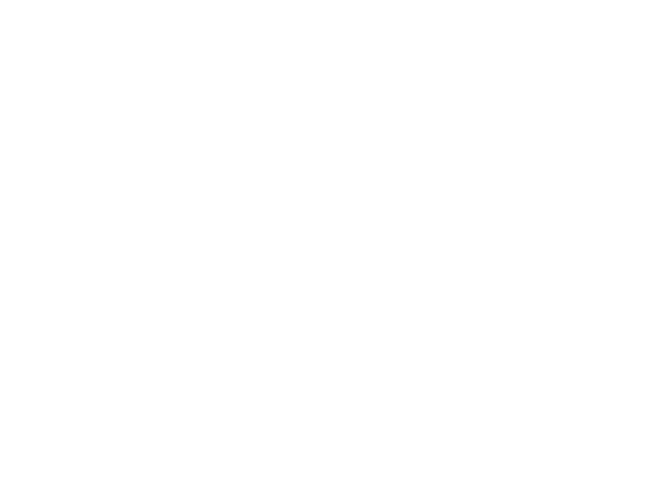

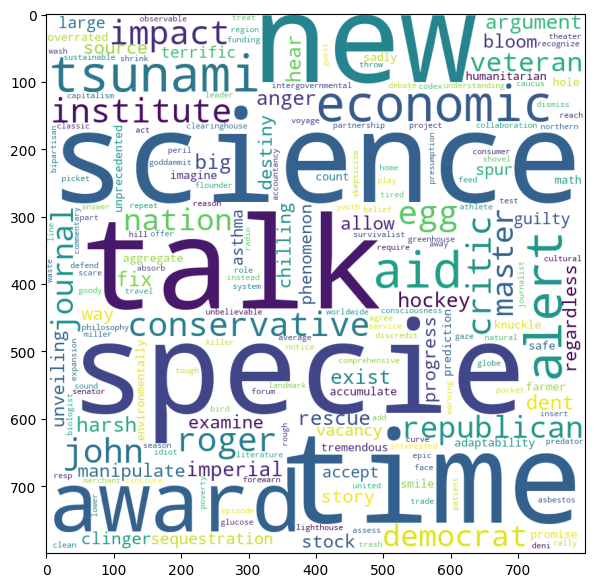

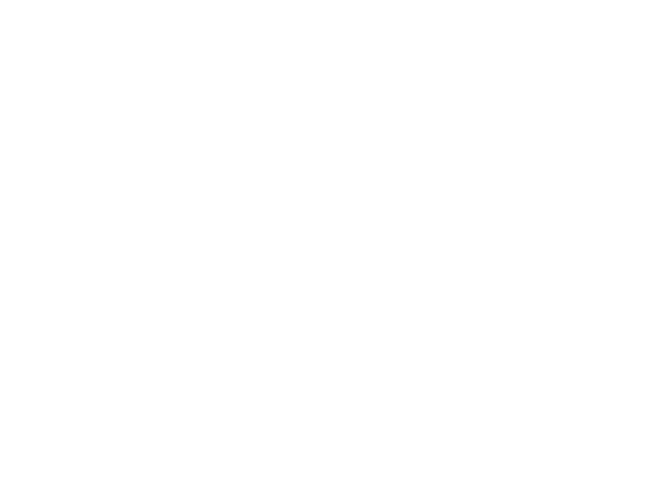

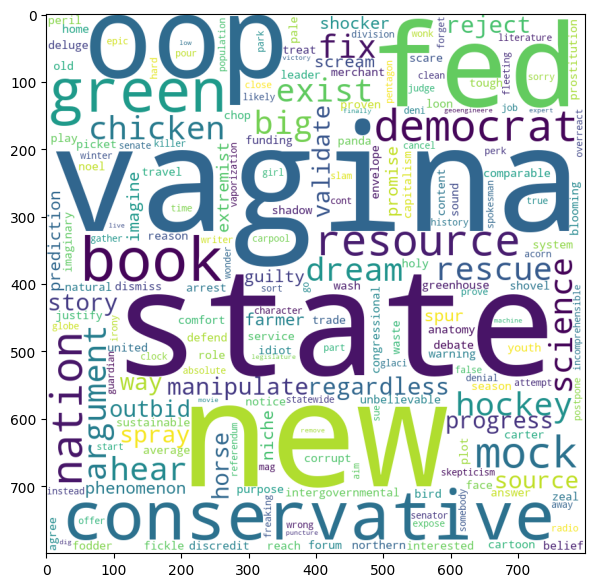

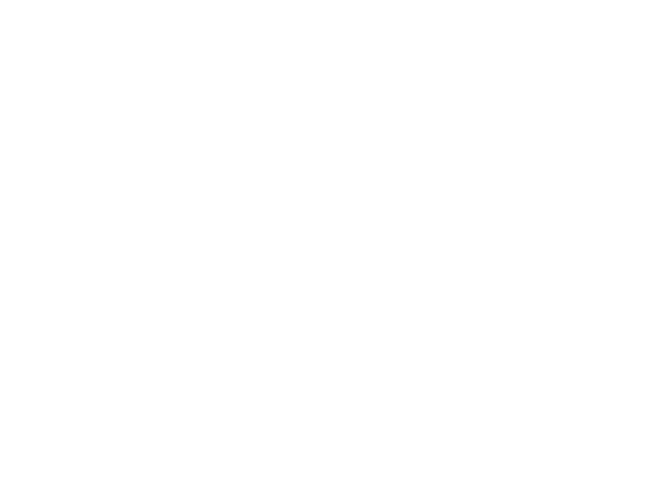

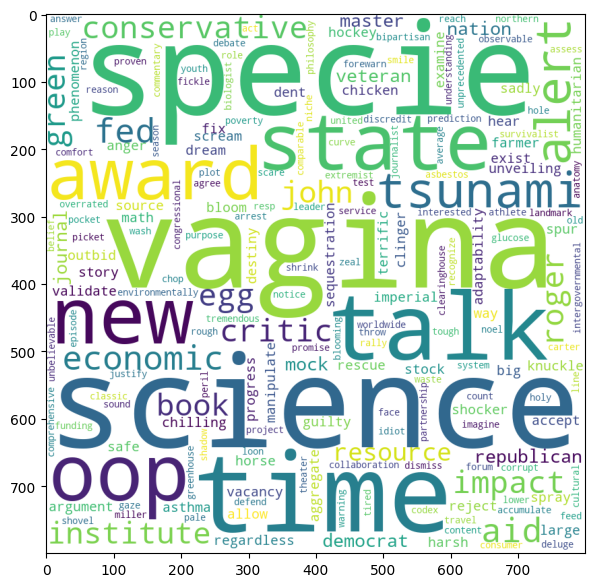

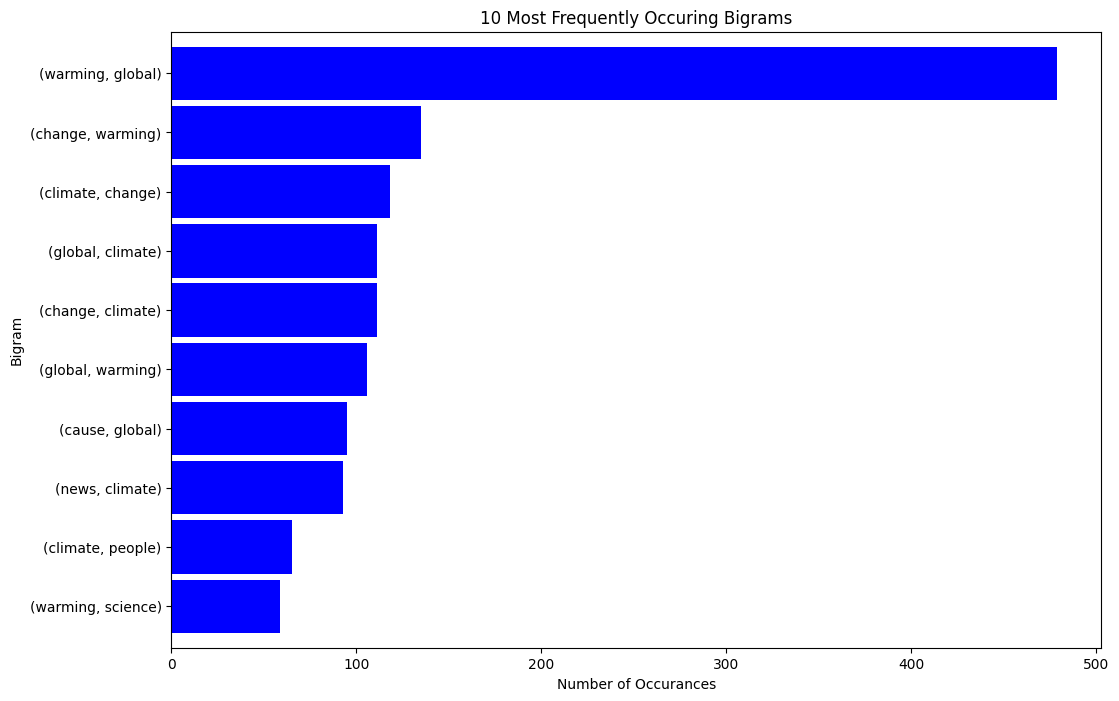

In [4]:
%run ./svg_Preprocessing.ipynb
%run ./svg_Visulaization.ipynb

In [5]:
# run the above code before running this line
X_train, X_test, y_train, y_test_nb= train_test_split(data_new.cleaned_tweet,data_new['existence'], test_size=0.2, random_state=33)

Use MultinomialNB

In [6]:
model_nb = make_pipeline(TfidfVectorizer(), MultinomialNB())
model_nb.fit(X_train, y_train)
predicted_categories_NB = model_nb.predict(X_test)

Create apickle file for webapp

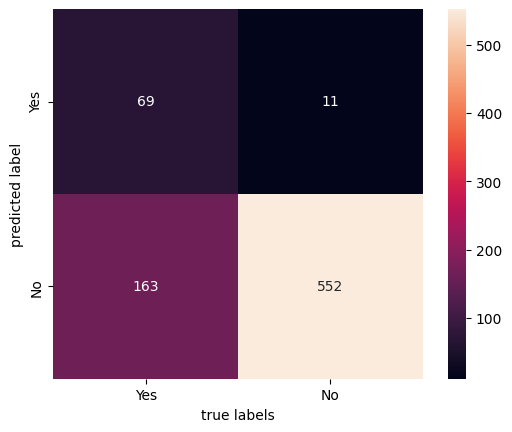

The testing accuracy is 0.7811320754716982
The training accuracy is 0.8641082101289713


In [7]:
# plot the confusion matrix
mat = confusion_matrix(y_test_nb, predicted_categories_NB)
sns.heatmap(mat.T, square = True, annot=True, fmt = "d", xticklabels=y_train.unique(),yticklabels=y_train.unique())
plt.xlabel("true labels")
plt.ylabel("predicted label")
plt.show()
print("The testing accuracy is {}".format(accuracy_score(y_test_nb, predicted_categories_NB)))
print("The training accuracy is {}".format(accuracy_score(y_train, model_nb.predict(X_train))))

In [8]:
#Cross Validation Score

In [9]:
scores_Naive_Bayes = cross_val_score(model_nb, data_new.cleaned_tweet,data_new['existence'], cv=10, scoring="accuracy")
print(scores_Naive_Bayes)
meanScore = scores_Naive_Bayes.mean()
print(meanScore * 100)

[0.81155779 0.7638191  0.81909548 0.74874372 0.79596977 0.78085642
 0.77078086 0.76070529 0.77833753 0.76574307]
77.95609027505284


Random Forest Classifier

In [10]:
X_train, X_test, y_train, y_test = train_test_split(data_new.cleaned_tweet,data_new['existence'], test_size=0.3, random_state=33)

In [11]:
from sklearn.ensemble import RandomForestClassifier
model_random_forest = make_pipeline(TfidfVectorizer(), RandomForestClassifier())
model_random_forest.fit(X_train, y_train)
predicted_categories_random_forest = model_random_forest.predict(X_test)

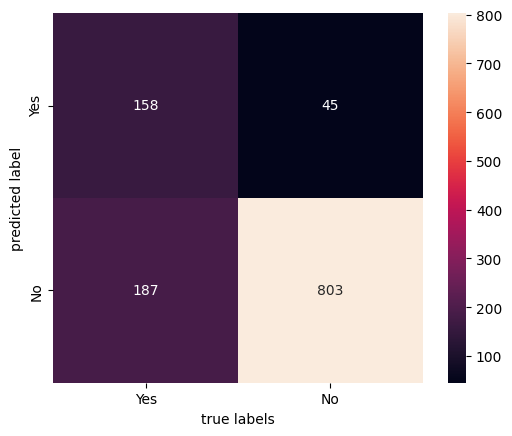

The testing accuracy is 0.8055322715842415
The training accuracy is 0.9856166846458109


In [12]:
# plot the confusion matrix
mat = confusion_matrix(y_test, predicted_categories_random_forest)
sns.heatmap(mat.T, square = True, annot=True, fmt = "d", xticklabels=y_train.unique(),yticklabels=y_train.unique())
plt.xlabel("true labels")
plt.ylabel("predicted label")
plt.show()
print("The testing accuracy is {}".format(accuracy_score(y_test, predicted_categories_random_forest)))
print("The training accuracy is {}".format(accuracy_score(y_train, model_random_forest.predict(X_train))))

In [13]:
scores_random_forest = cross_val_score(model_random_forest, data_new.cleaned_tweet,data_new['existence'], cv=10, scoring="accuracy")
print(scores_random_forest)
meanScore = scores_random_forest.mean()
print(meanScore * 100)

[0.87939698 0.80653266 0.83165829 0.8040201  0.76574307 0.77078086
 0.74055416 0.76574307 0.79345088 0.78589421]
79.4377428705239


Comparisions between models

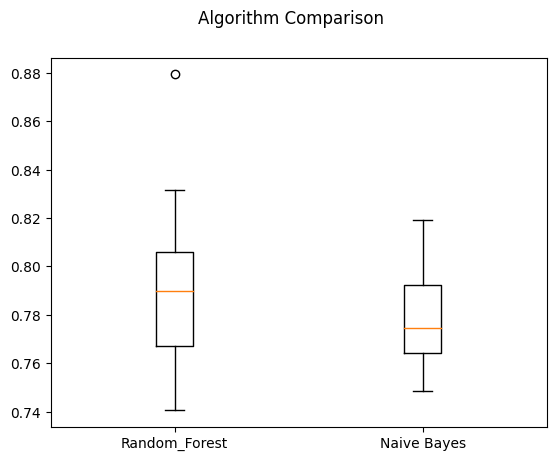

In [14]:
results=[]
names=[]
results.append(scores_random_forest)
names.append("Random_Forest")


results.append(scores_Naive_Bayes)
names.append("Naive Bayes")



# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [15]:
accu_rf=round(accuracy_score(y_test,predicted_categories_random_forest),3)
f1_score_rf=round(f1_score(y_test,predicted_categories_random_forest,average="binary",pos_label="Yes"), 3)
Precision_rf=round(precision_score(y_test,predicted_categories_random_forest,average="binary",pos_label="Yes"),3)
Recall_rf=round(recall_score(y_test,predicted_categories_random_forest,average="binary",pos_label="Yes"),3)
print('Accuracy:',accu_rf)
print('F1_Score:',f1_score_rf)
print('Recall_Score:',Precision_rf)
print('Precision_Score:',Recall_rf)

Accuracy: 0.806
F1_Score: 0.874
Recall_Score: 0.811
Precision_Score: 0.947


In [16]:
accu_nb=round(accuracy_score(y_test_nb,predicted_categories_NB),3)
f1_score_nb=round(f1_score(y_test_nb,predicted_categories_NB,average="binary",pos_label="Yes"),3)
Precision_nb=round(precision_score(y_test_nb,predicted_categories_NB,average="binary",pos_label="Yes"),3)
Recall_nb=round(recall_score(y_test_nb,predicted_categories_NB,average="binary",pos_label="Yes"),3)
print('Accuracy:',accu_nb)
print('F1_Score:',f1_score_nb)
print('Recall_Score:',Precision_nb)
print('Precision_Score:',Recall_nb)

Accuracy: 0.781
F1_Score: 0.864
Recall_Score: 0.772
Precision_Score: 0.98


In [17]:
Result_2={
                  'Model':['Random-Forest','Naive Bayes'],
                  'Accuracy(%)':[accu_rf*100,accu_nb*100],
                  'F1_Score(%)':[f1_score_rf*100,f1_score_nb*100],
                  'Precision(%)':[Precision_rf*100,Precision_nb*100],
                  'Recall(%)':[Recall_rf*100,Recall_nb*100]
        
                    }
Result_final=pd.DataFrame(Result_2)

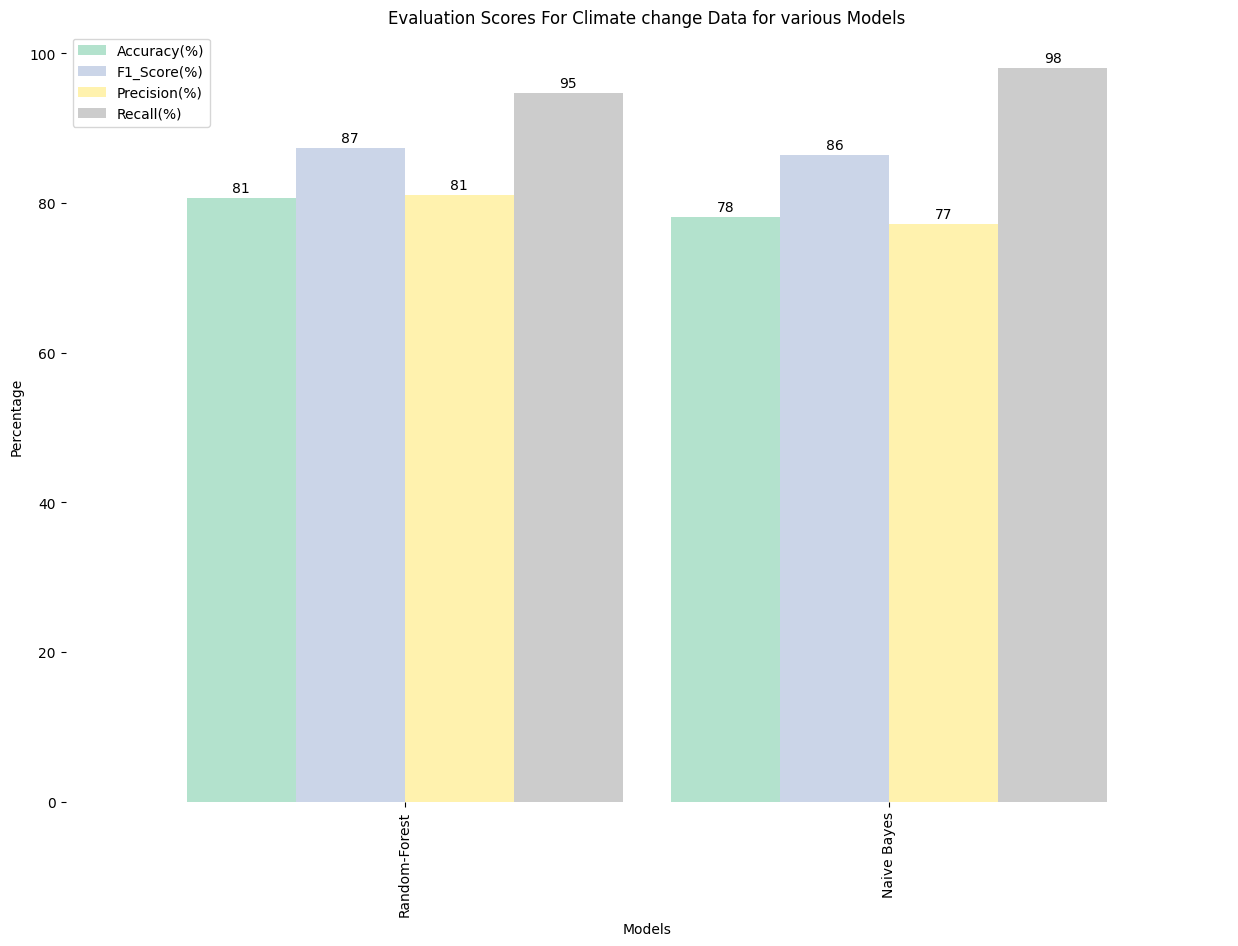

In [18]:
splot=Result_final.plot(x='Model',y=['Accuracy(%)','F1_Score(%)','Precision(%)','Recall(%)'],kind='bar',figsize=(15,10),cmap='Pastel2',width=0.9)
for p in splot.patches:
    splot.annotate(format(round(p.get_height()), '.0f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0,7),
                   textcoords='offset points')
plt.title('Evaluation Scores For Climate change Data for various Models')
plt.ylabel('Percentage')
plt.xlabel('Models')
plt.legend(loc='upper left')
for pos in ['right', 'top', 'bottom', 'left']:
    plt.gca().spines[pos].set_visible(False)
plt.show()